# 🫧 Clustering jerárquico

1. Librerías y dataset

In [17]:
import numpy as nop
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering 

In [33]:
df = pd.read_csv('C:/Users/giuli/OneDrive/.repositorios/machine-learning-level-up/clase09/Datasets/shopping_data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Selección de datos para el clustering

In [34]:
matriz_df = df.iloc[:,3:5].values  #selección de las columnas, en este caso 4 y 5
matriz_df[:5] #visuali

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

3. Dendograma

In [35]:
import scipy.cluster.hierarchy as shc #importo la librería necesaria

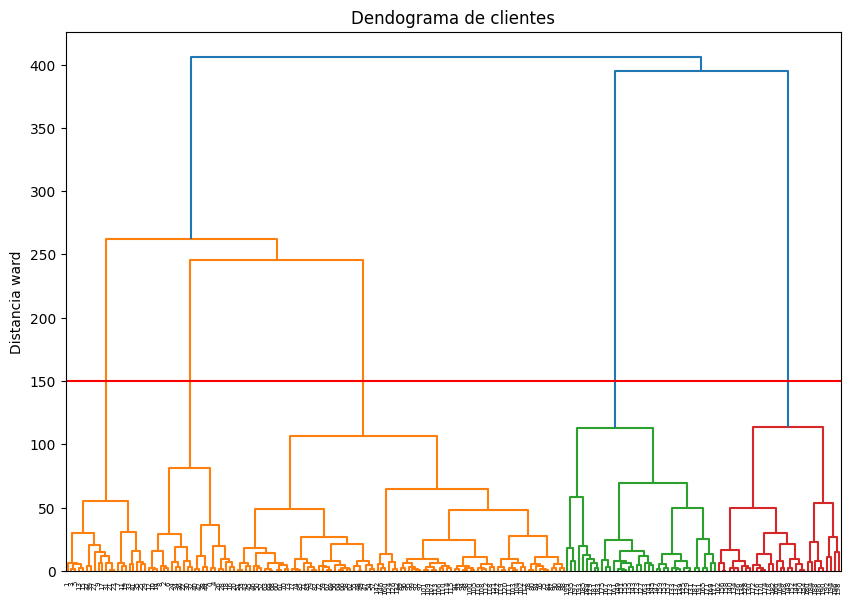

In [36]:
# Plot del dendograma del dataset de clientes
plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

# Con la función 'dendogram' graficamos el dendograma. 
dend = shc.dendrogram(shc.linkage(matriz_df, method='ward')) #Calcula la matriz de enlace utilizando el método de Ward. 
                                                            # Este método minimiza la varianza dentro de los clústeres 
                                                            # al fusionar clústeres. Se utiliza para calcular la 
                                                            # distancia entre los clústeres.
plt.axhline(150, c='r')

4. Modelo

 * **AgglomerativeClustering_** es la implementación de clustering jerárquico aglomerativo en sklearn.
 * **n_clusters=5**: Establece que el modelo debe encontrar 5 clústeres.
 * **metric='euclidean'**: Usa la distancia euclidiana para medir la similitud entre puntos.
 * **linkage='ward'**: Utiliza el método de Ward para fusionar los clústeres, que minimiza la varianza total dentro de los clústeres
 * **fit_predict(matriz_df)**: Ajusta el modelo a los datos y predice las etiquetas de clúster para cada punto en matriz_df. Las etiquetas resultantes se almacenan en cluster.labels_. 

In [43]:
# Creamos el modelo
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Lo ajustamos con los datos
cluster.fit_predict(matriz_df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

Text(0, 0.5, 'Puntaje de gastos')

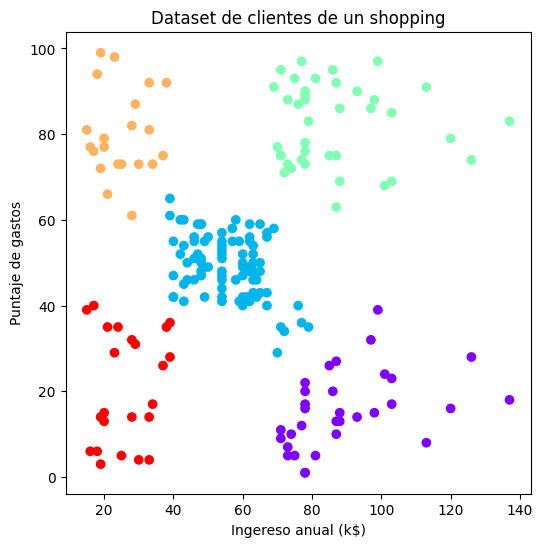

In [44]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(6,6))
plt.title("Dataset de clientes de un shopping")
plt.scatter(matriz_df[:,0], matriz_df[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Ingereso anual (k$)")
plt.ylabel("Puntaje de gastos")